In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import os
from datetime import datetime


In [2]:
file_path = '/content/data.xlsx'
data = pd.read_excel(file_path)

data.columns = [
    'time',
    'Cyclone_Inlet_Gas_Temp',
    'Cyclone_Material_Temp',
    'Cyclone_Outlet_Gas_draft',
    'Cyclone_cone_draft',
    'Cyclone_Gas_Outlet_Temp',
    'Cyclone_Inlet_Draft'
]


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data.isnull()

time  Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
0       False                   False                  False   
1       False                   False                  False   
2       False                   False                  False   
3       False                   False                  False   
4       False                   False                  False   
...       ...                     ...                    ...   
377714  False                   False                  False   
377715  False                   False                  False   
377716  False                   False                  False   
377717  False                   False                  False   
377718  False                   False                  False   

        Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
0                          False               False                    False   
1                          False               False                    False   
2                          False               False                    False   
3                          False               False                    False   
4                          False               False                    False   
...                          ...                 ...                      ...   
377714                     False               False                    False   
377715                     False               False                    False   
377716                     False               False                    False   
377717                     False               False                    False   
377718                     False               False                    False   

        Cyclone_Inlet_Draft  
0                     False  
1                     False  
2                     False  
3                     False  
4                     False  
...                     ...  
377714                False  
377715                False  
377716                False  
377717                False  
377718                False  

[377719 rows x 7 columns]

In [4]:
print(data.dtypes)

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object


In [5]:
data['time'] = pd.to_datetime(data['time'], errors='coerce')
data = data.dropna(subset=['time'])

In [6]:
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna()

In [7]:
df_copy = data.copy()

In [8]:
df_copy['time'] = pd.to_datetime(df_copy['time'])
df_copy = df_copy.set_index('time')

c = df_copy.asfreq(pd.infer_freq(df_copy.index))

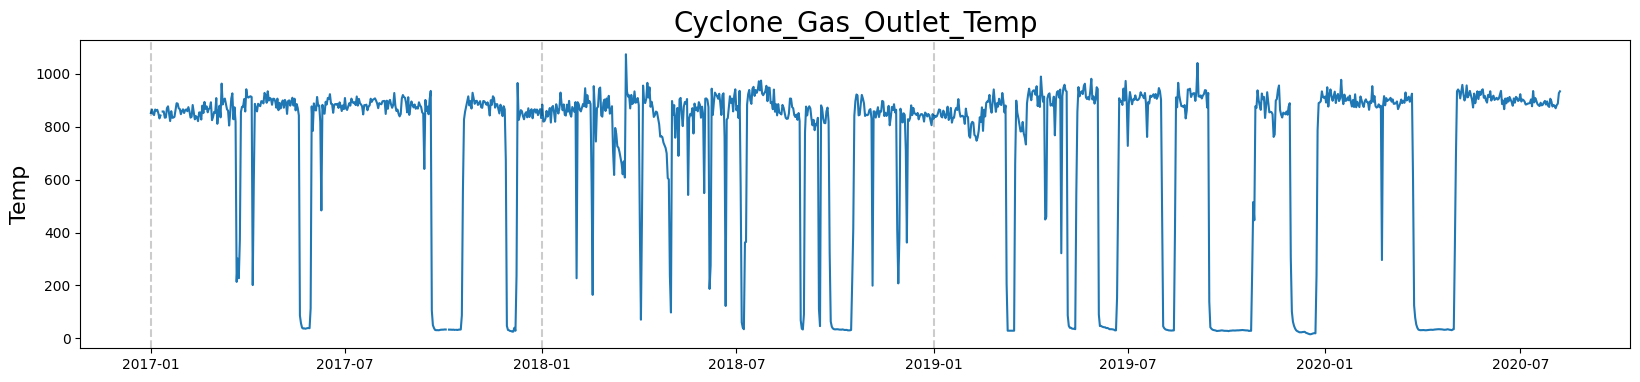

In [9]:

plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Gas_Outlet_Temp'])
plt.title('Cyclone_Gas_Outlet_Temp', fontsize=20)
plt.ylabel('Temp', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

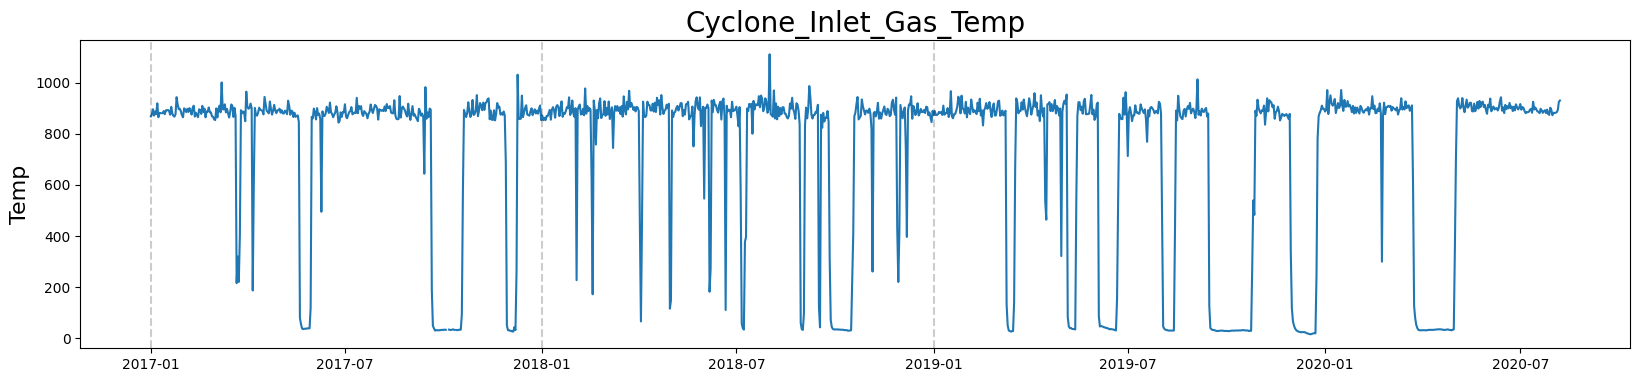

In [10]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Inlet_Gas_Temp'])
plt.title('Cyclone_Inlet_Gas_Temp', fontsize=20)
plt.ylabel('Temp', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)



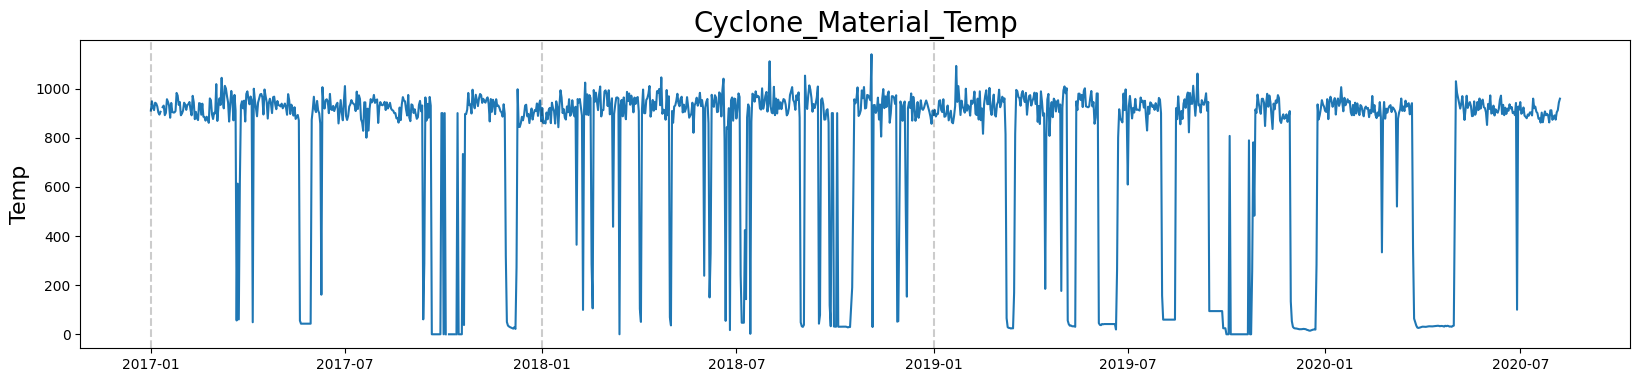

In [11]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Material_Temp'])
plt.title('Cyclone_Material_Temp', fontsize=20)
plt.ylabel('Temp', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


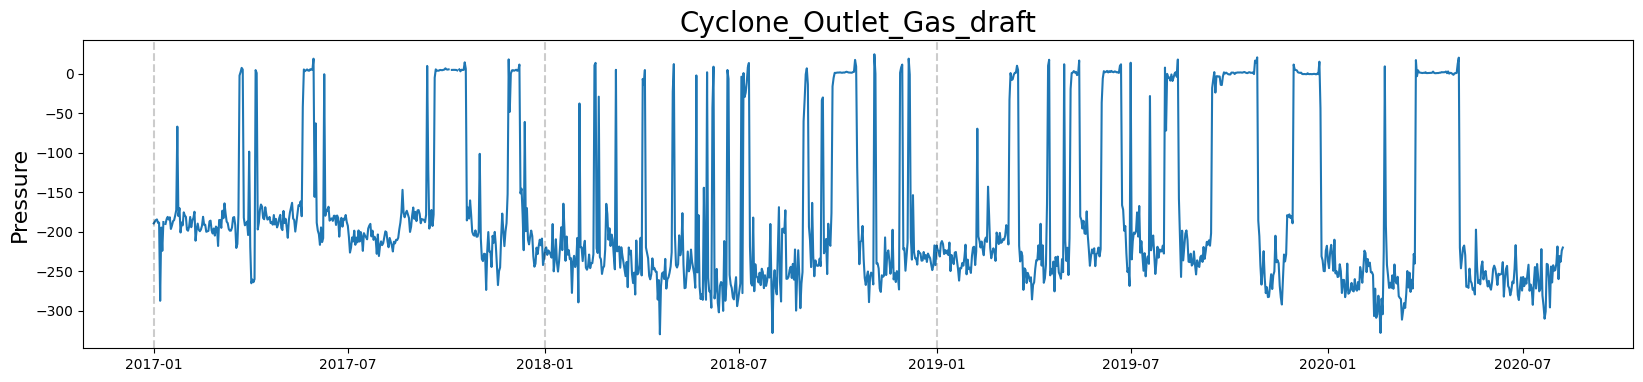

In [12]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Outlet_Gas_draft'])
plt.title('Cyclone_Outlet_Gas_draft', fontsize=20)
plt.ylabel('Pressure', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


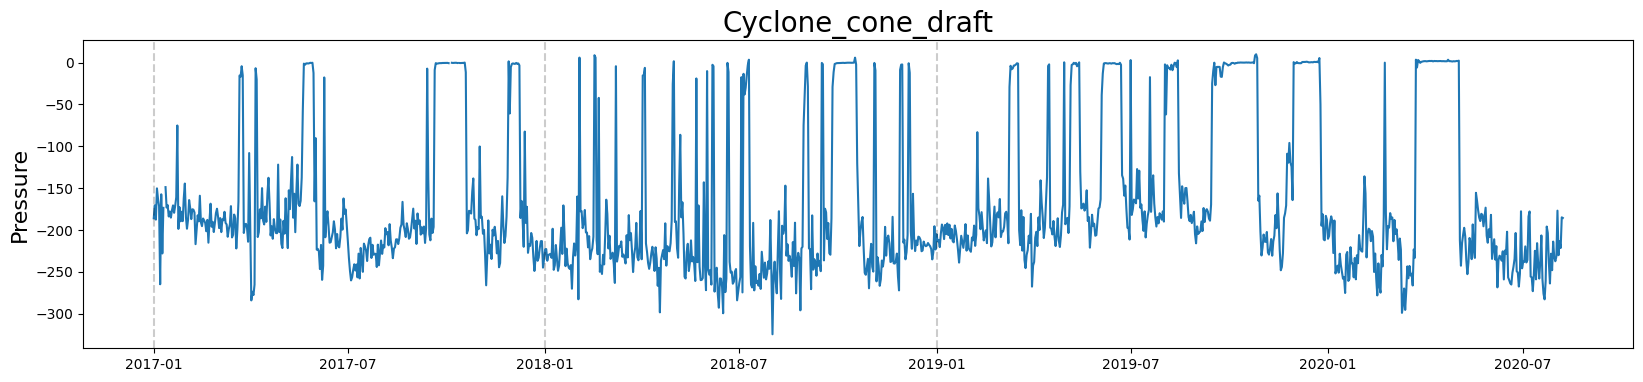

In [13]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_cone_draft'])
plt.title('Cyclone_cone_draft', fontsize=20)
plt.ylabel('Pressure', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)



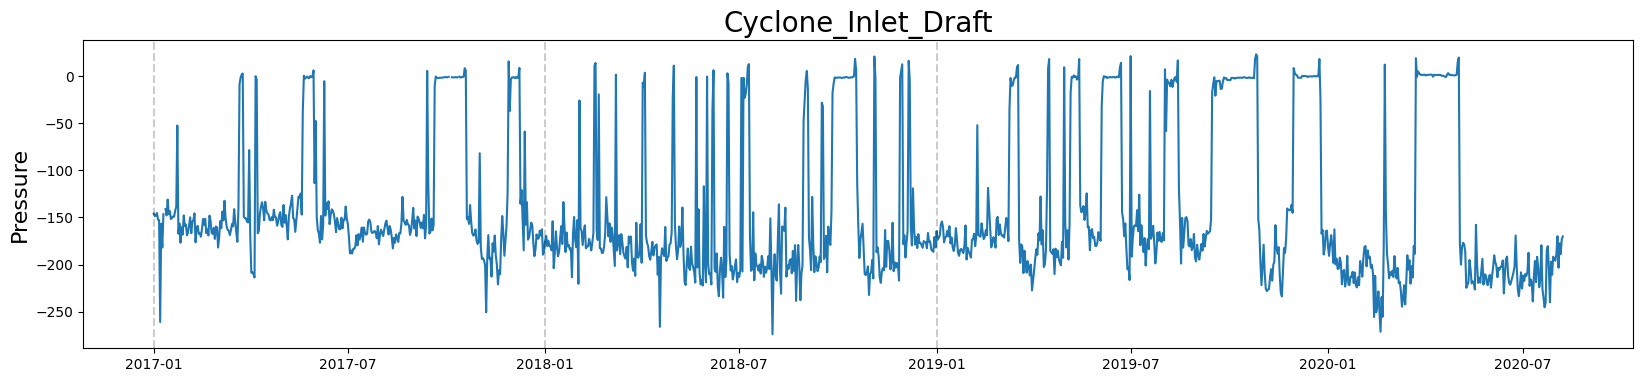

In [14]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Inlet_Draft'])
plt.title('Cyclone_Inlet_Draft', fontsize=20)
plt.ylabel('Pressure', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


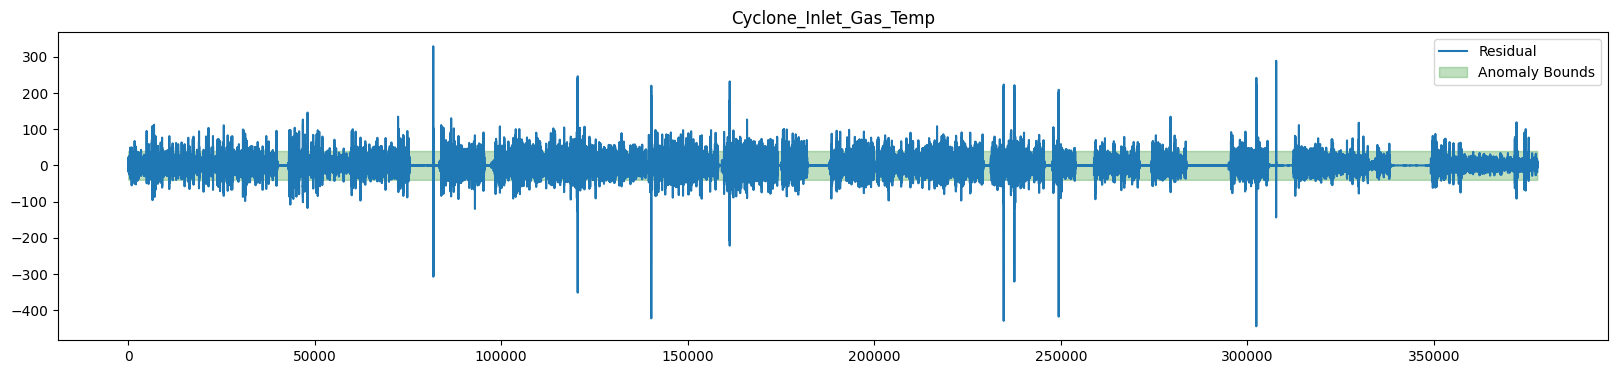

<Figure size 1600x1000 with 0 Axes>

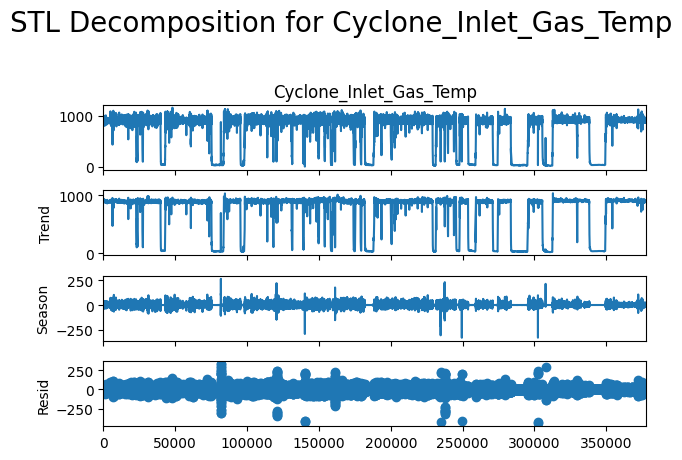

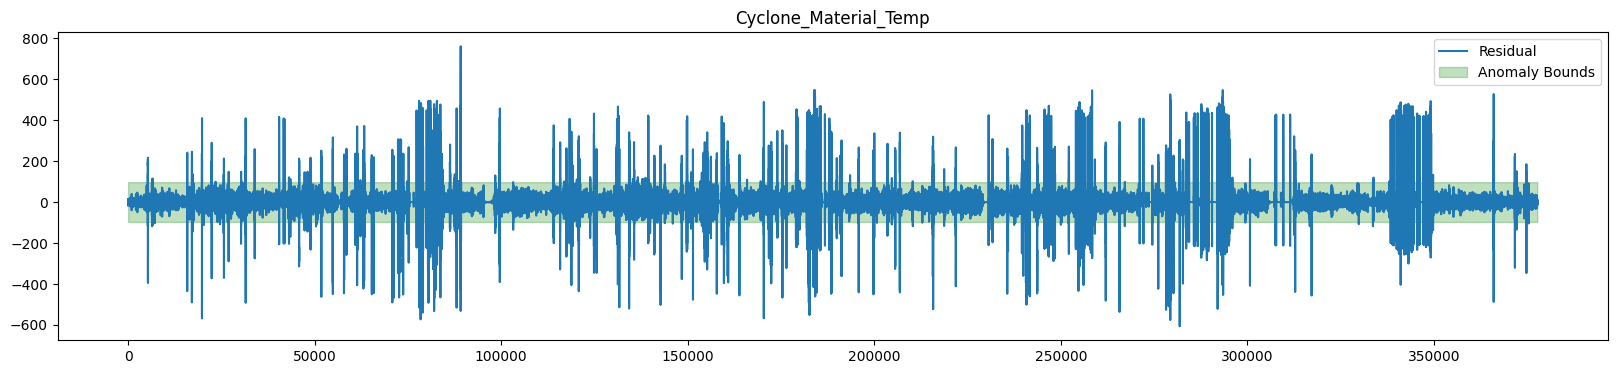

<Figure size 1600x1000 with 0 Axes>

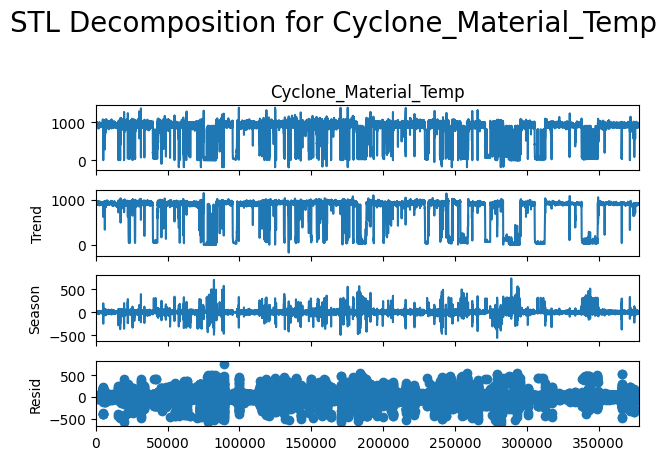

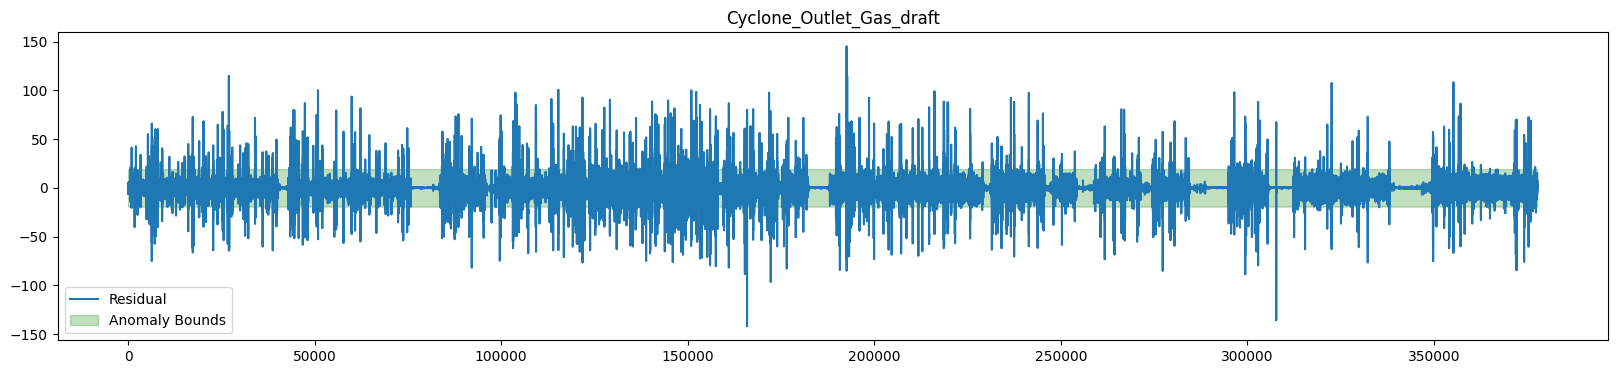

<Figure size 1600x1000 with 0 Axes>

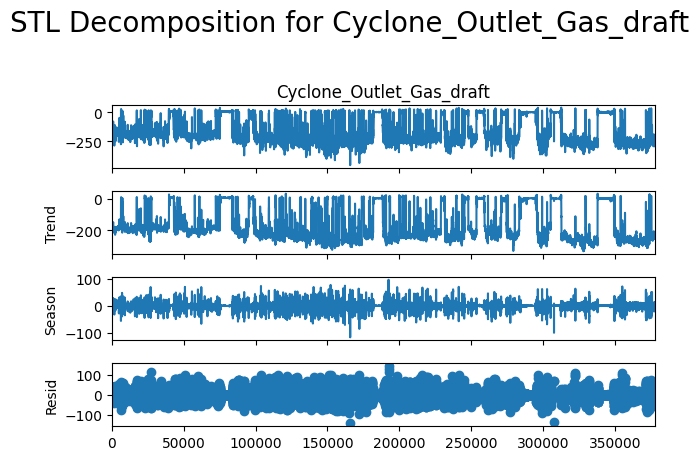

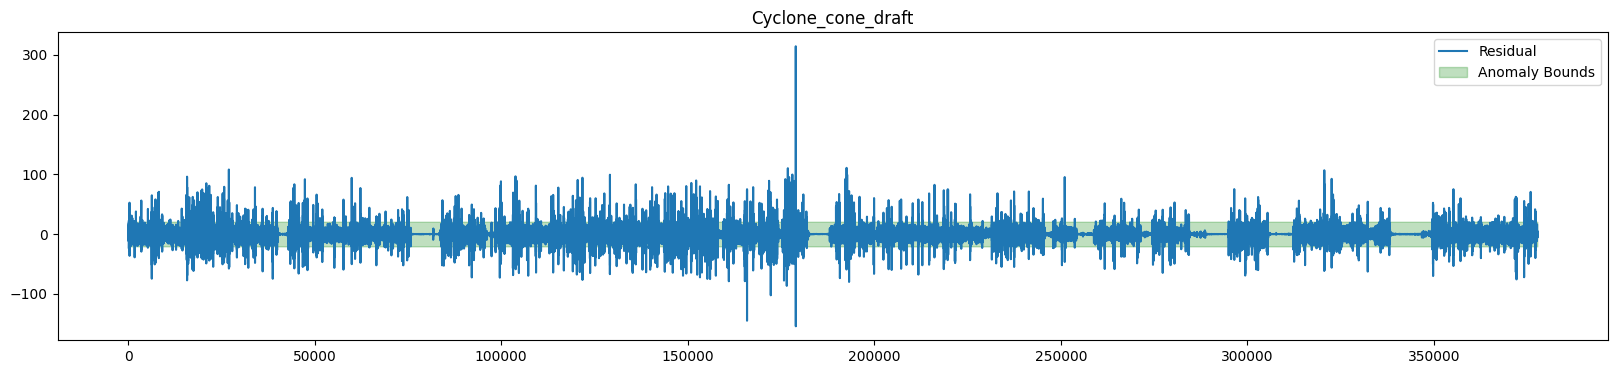

<Figure size 1600x1000 with 0 Axes>

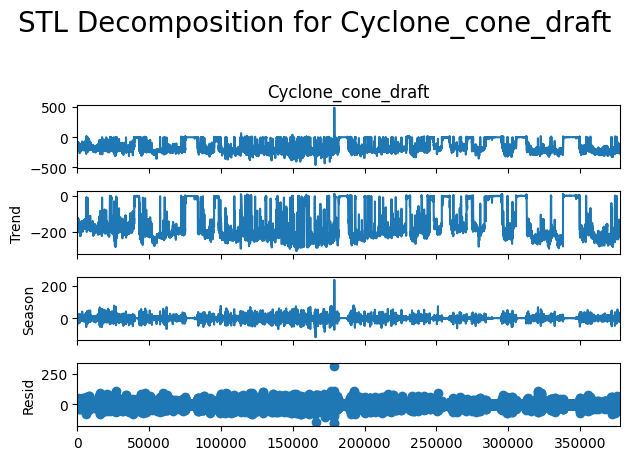

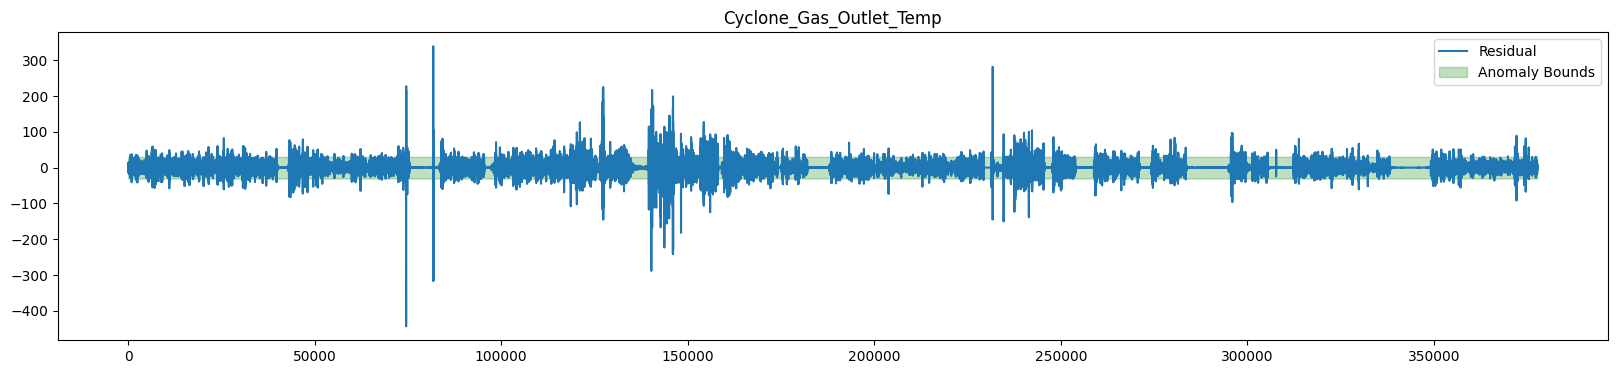

<Figure size 1600x1000 with 0 Axes>

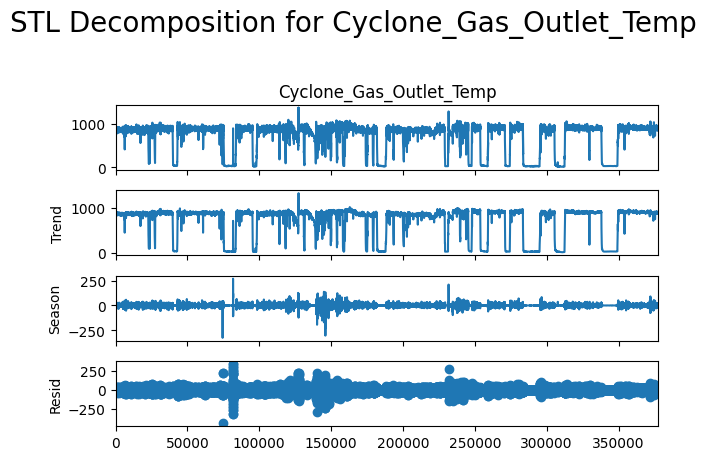

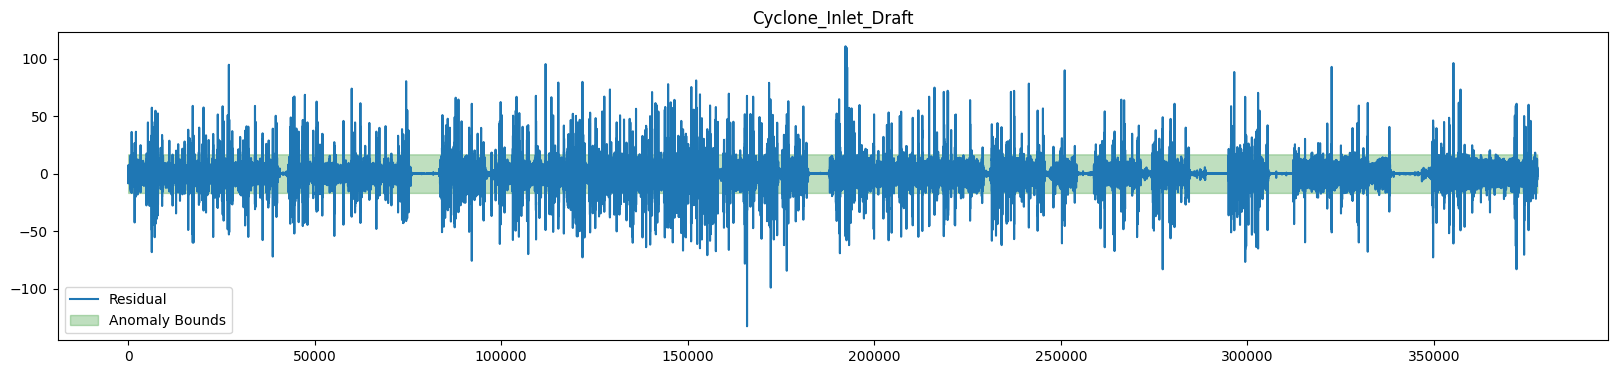

<Figure size 1600x1000 with 0 Axes>

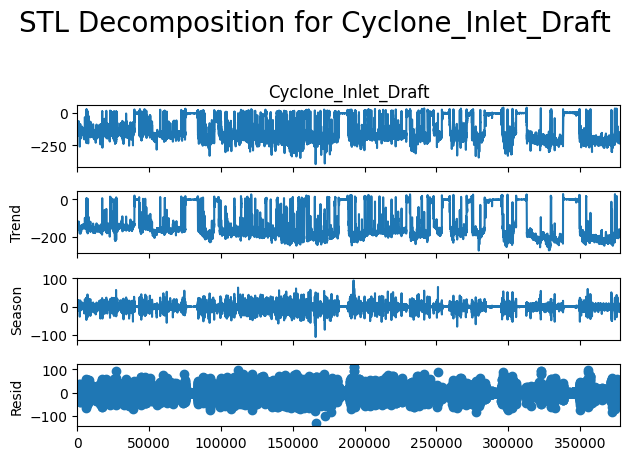

In [15]:
stl_residuals = pd.DataFrame(index=data.index)
stl_components = {}

for col in data.columns[1:]:
    stl = STL(data[col], seasonal=5, period=13)
    result = stl.fit()
    stl_components[col] = result

    stl_residuals[col] = result.resid

    resid_mu = result.resid.mean()
    resid_dev = result.resid.std()
    lower = resid_mu - 3 * resid_dev
    upper = resid_mu + 3 * resid_dev


    plt.figure(figsize=(20, 4))
    plt.plot(result.resid, label='Residual')
    plt.fill_between(result.resid.index, lower, upper, color='g', alpha=0.25, label='Anomaly Bounds')
    plt.title(col)
    plt.legend()

    plt.figure(figsize=(16, 10))
    result.plot()
    plt.suptitle(f'STL Decomposition for {col}', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [16]:


lof = LocalOutlierFactor(n_neighbors=50, contamination=0.01)
data['anomaly'] = lof.fit_predict(stl_residuals)
data['anomaly'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

In [17]:

anomalies = data[data['anomaly'] == 1]
print(f"Total anomalies detected: {len(anomalies)}")

Total anomalies detected: 3762


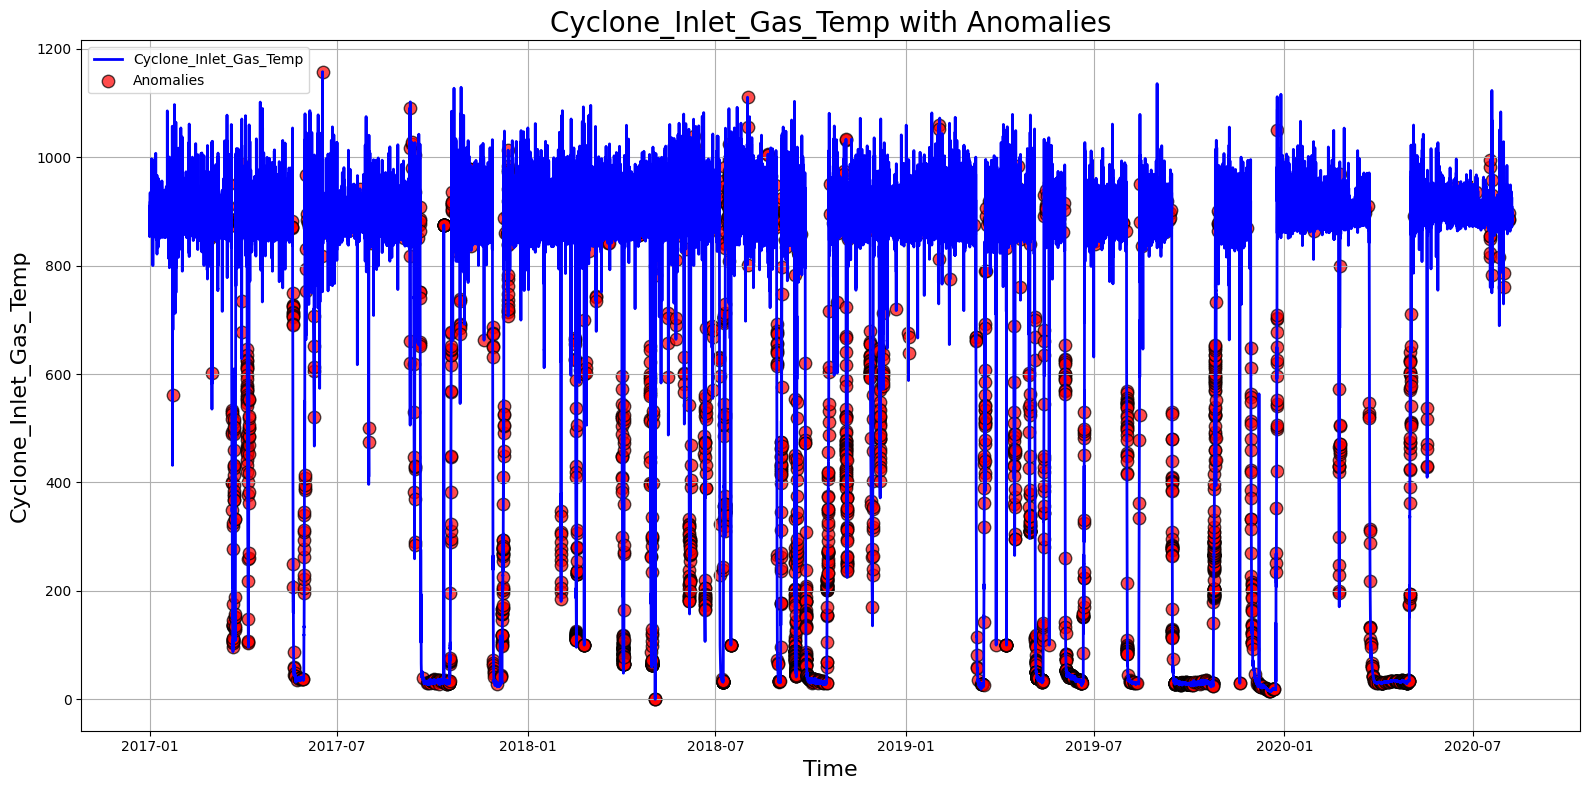

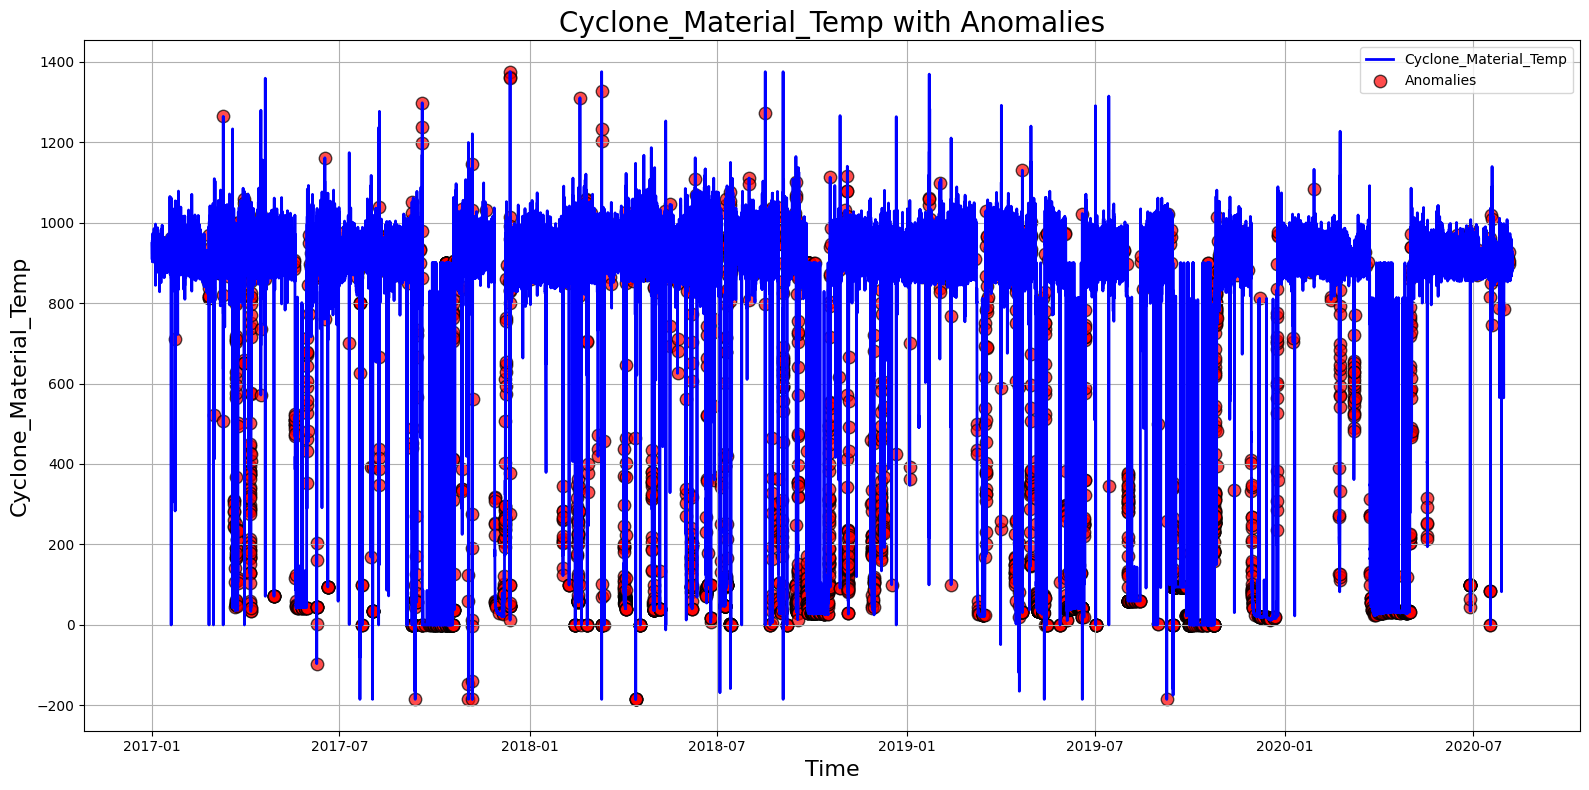

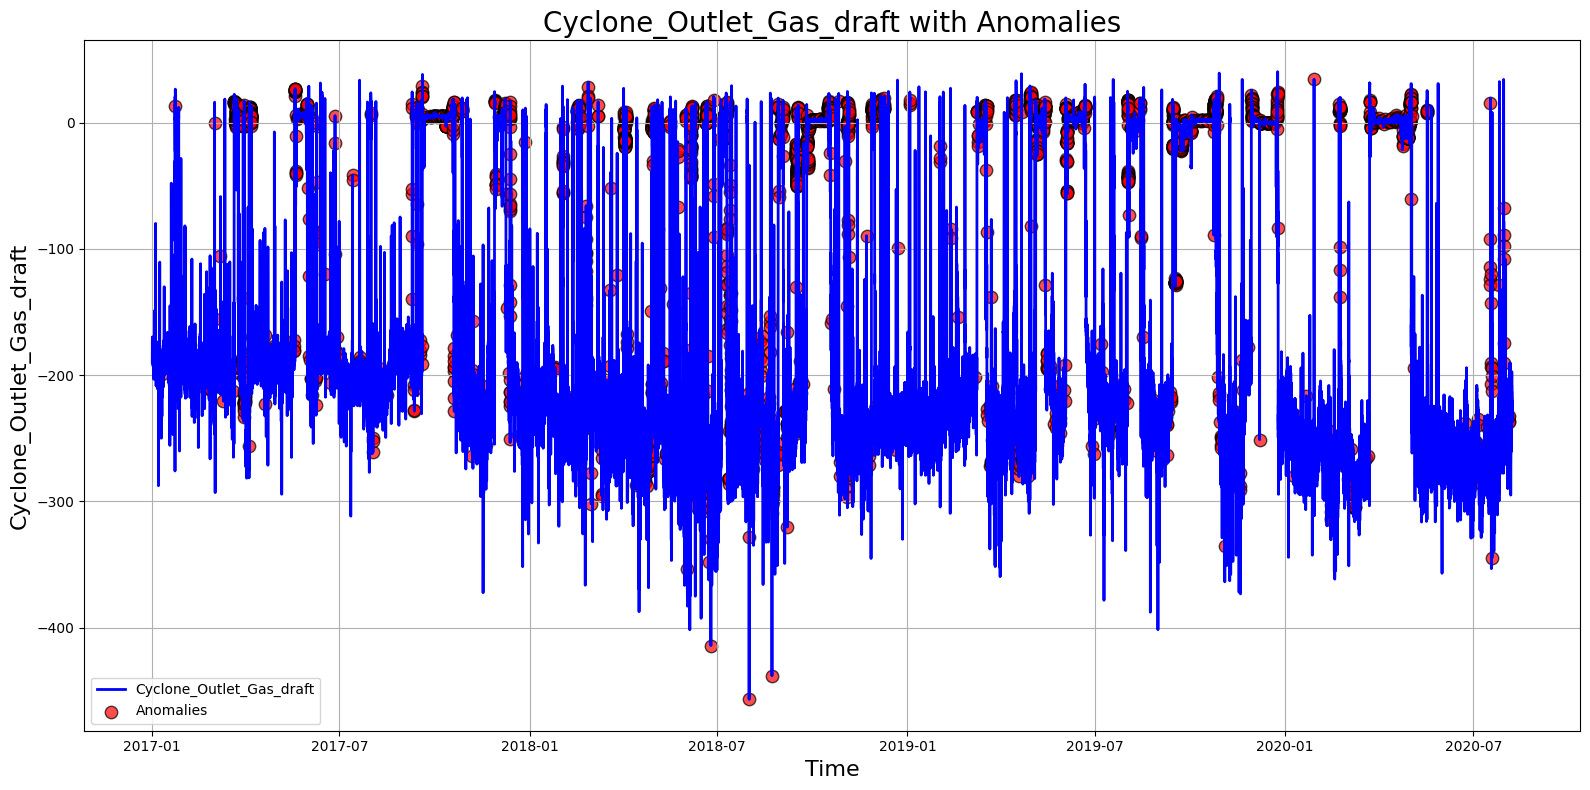

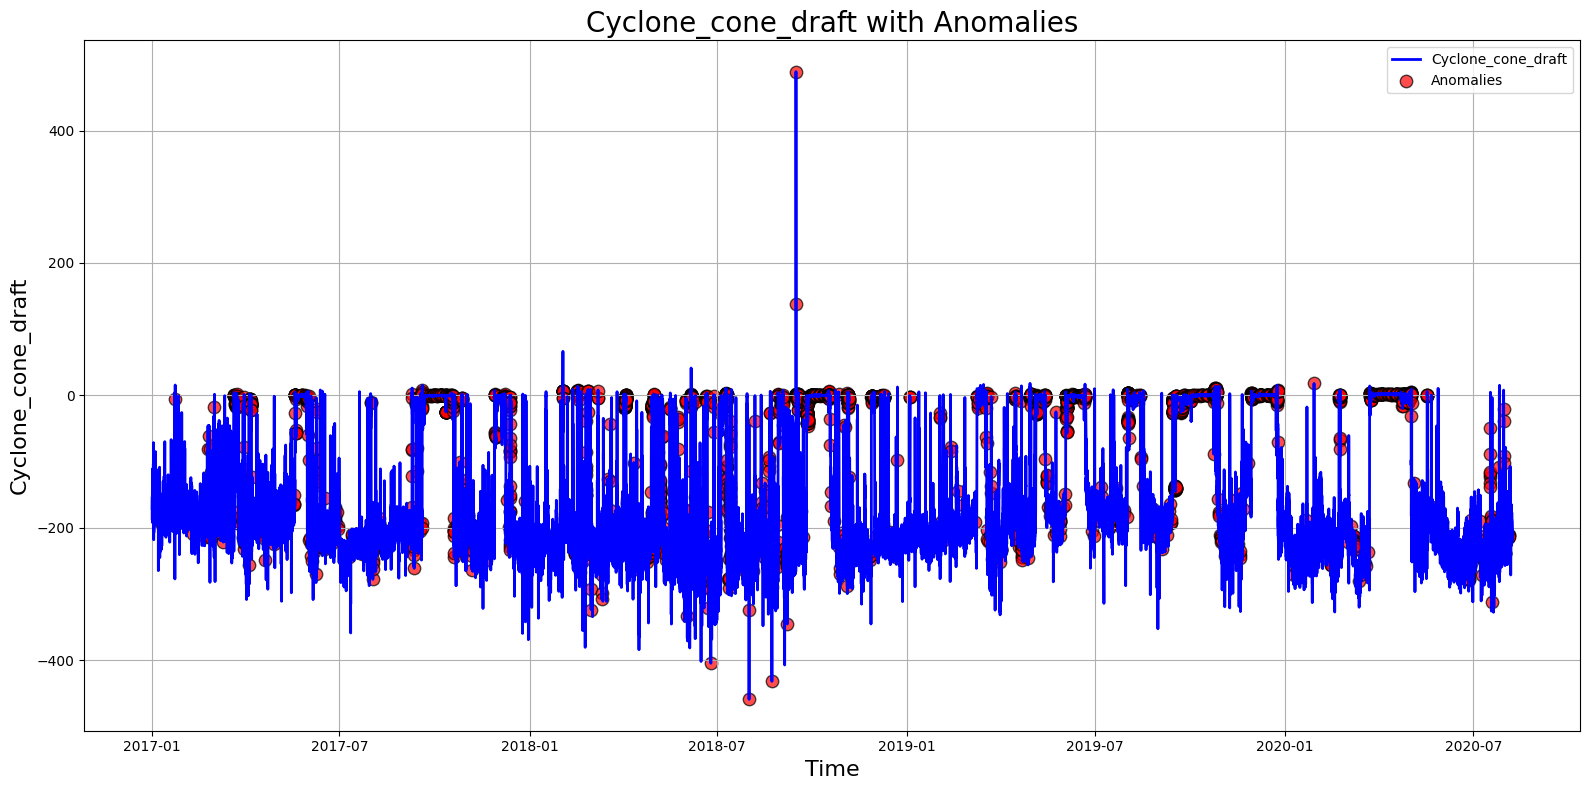

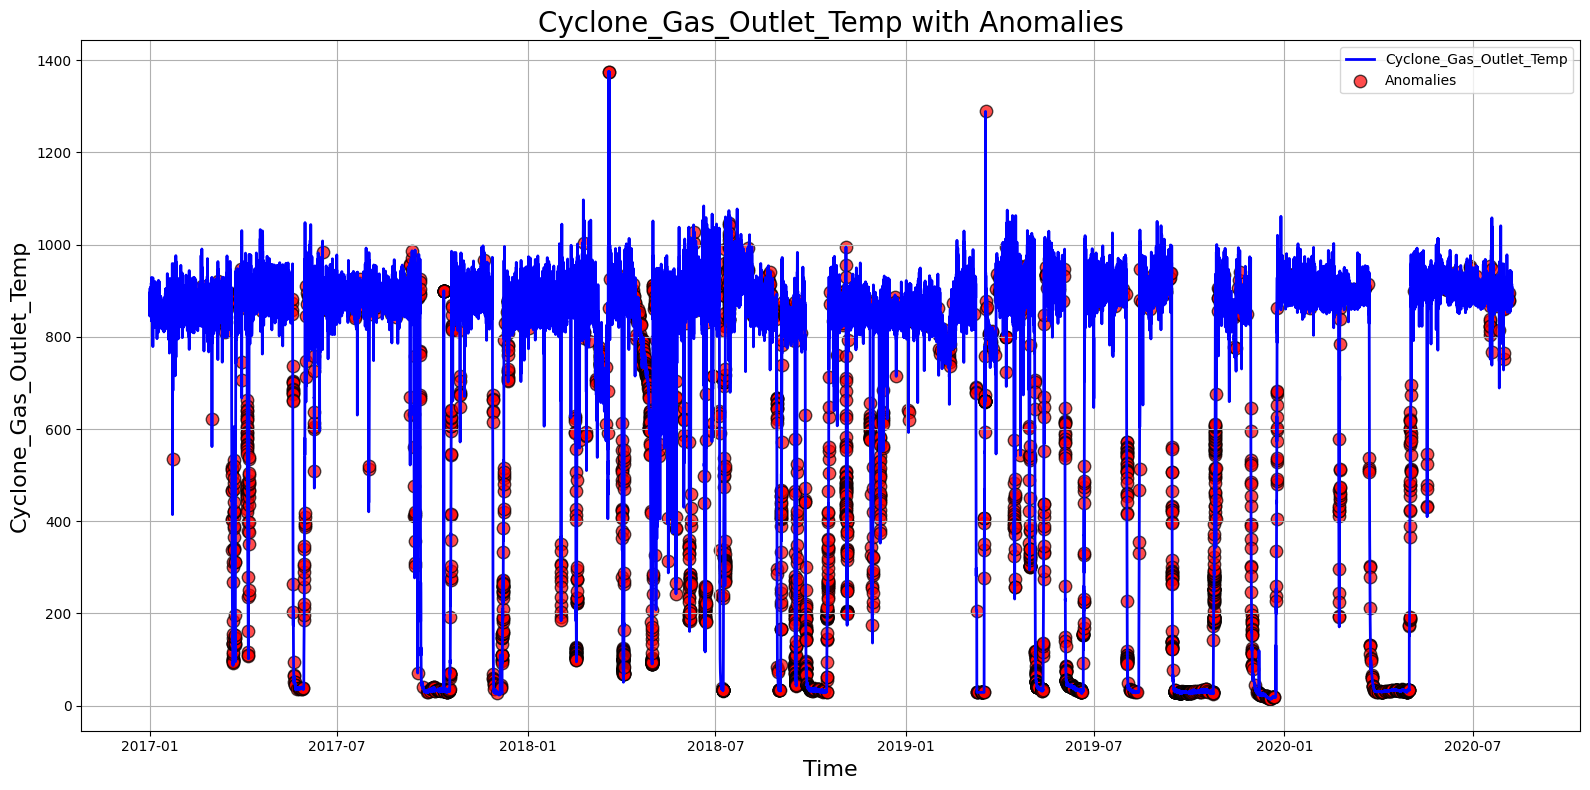

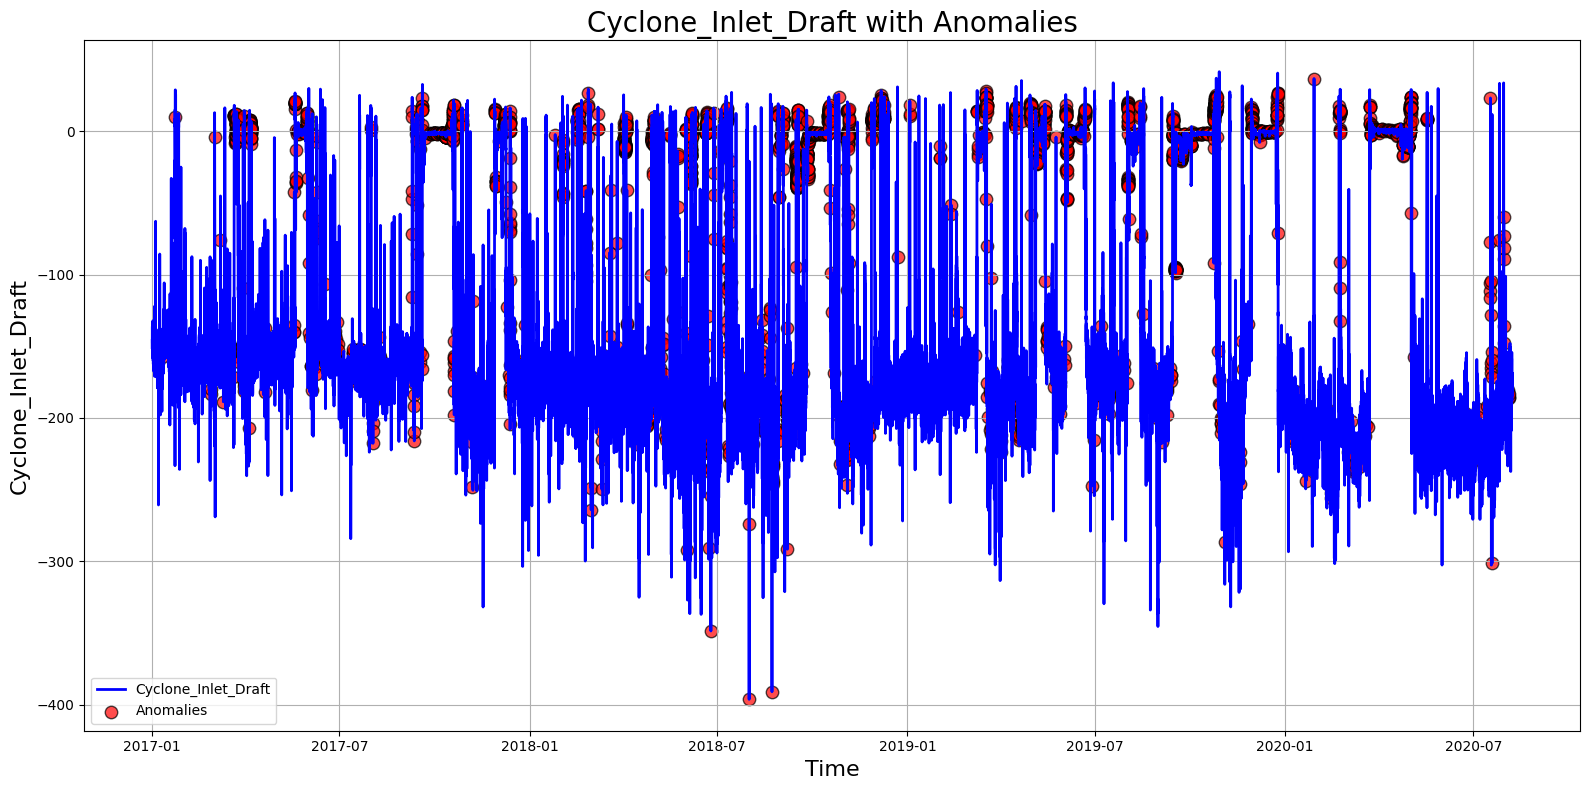

In [18]:
for col in data.columns[1:-1]:
    plt.figure(figsize=(16, 8))
    plt.plot(data['time'], data[col], label=col, color='blue', linewidth=2)
    plt.scatter(anomalies['time'], anomalies[col], color='red', label='Anomalies', alpha=0.7, edgecolor='black', s=80)
    plt.title(f"{col} with Anomalies", fontsize=20)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel(col, fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [19]:





output_folder = '/content/Output_Plots/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for col in data.columns[1:-1]:
    plt.figure(figsize=(16, 8))
    plt.plot(data['time'], data[col], label=col, color='k', linewidth=2)
    plt.scatter(anomalies['time'], anomalies[col], color='red', label='Anomalies', alpha=0.7, edgecolor='black', s=80)
    plt.title(f"{col} - Anomalies Detected after STL and LOF", fontsize=20)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel(col, fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{output_folder}/{col}_anomalies_STL_LOF.png", bbox_inches='tight')
    plt.close()

anomalies.to_csv(f"{output_folder}/anomalies_STL_LOF_detected.csv", index=False)




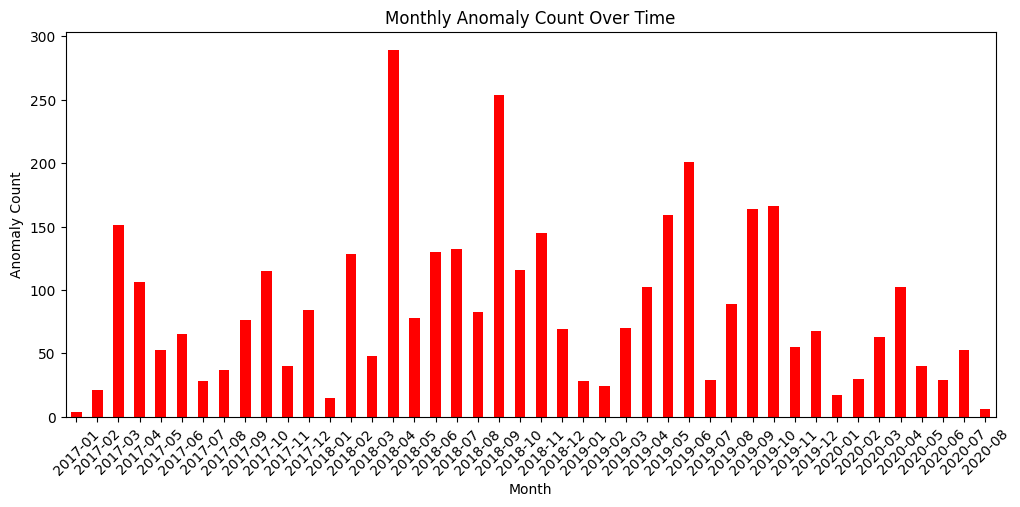

In [20]:
data['year_month'] = data['time'].dt.to_period('M')

monthly_anomalies = data[data['anomaly'] == 1].groupby('year_month').size()

plt.figure(figsize=(12, 5))
monthly_anomalies.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Anomaly Count')
plt.title('Monthly Anomaly Count Over Time')
plt.xticks(rotation=45)
plt.show()


In [21]:
import pandas as pd

file_path = '/content/Output_Plots/anomalies_STL_LOF_detected.csv'
data = pd.read_csv(file_path, parse_dates=['time'])

anomalies = data[data['anomaly'] == 1]

affected_counts = anomalies.drop(columns=['time', 'anomaly']).apply(lambda col: (anomalies['Cyclone_Material_Temp'].notna() & col.notna()).sum())

print("Number of times other columns have anomalies affecting Cyclone_Material_Temp:\n", affected_counts)


Number of times other columns have anomalies affecting Cyclone_Material_Temp:
 Cyclone_Inlet_Gas_Temp      3762
Cyclone_Material_Temp       3762
Cyclone_Outlet_Gas_draft    3762
Cyclone_cone_draft          3762
Cyclone_Gas_Outlet_Temp     3762
Cyclone_Inlet_Draft         3762
dtype: int64


In [22]:
anomaly_corr = anomalies.drop(columns=['time', 'anomaly']).corr()

print("Correlation matrix among anomaly-only data:\n", anomaly_corr)


Correlation matrix among anomaly-only data:
                           Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
Cyclone_Inlet_Gas_Temp                  1.000000               0.727728   
Cyclone_Material_Temp                   0.727728               1.000000   
Cyclone_Outlet_Gas_draft               -0.769791              -0.587577   
Cyclone_cone_draft                     -0.784524              -0.591548   
Cyclone_Gas_Outlet_Temp                 0.964990               0.734801   
Cyclone_Inlet_Draft                    -0.763610              -0.575994   

                          Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
Cyclone_Inlet_Gas_Temp                   -0.769791           -0.784524   
Cyclone_Material_Temp                    -0.587577           -0.591548   
Cyclone_Outlet_Gas_draft                  1.000000            0.964295   
Cyclone_cone_draft                        0.964295            1.000000   
Cyclone_Gas_Outlet_Temp                  -0.772638         

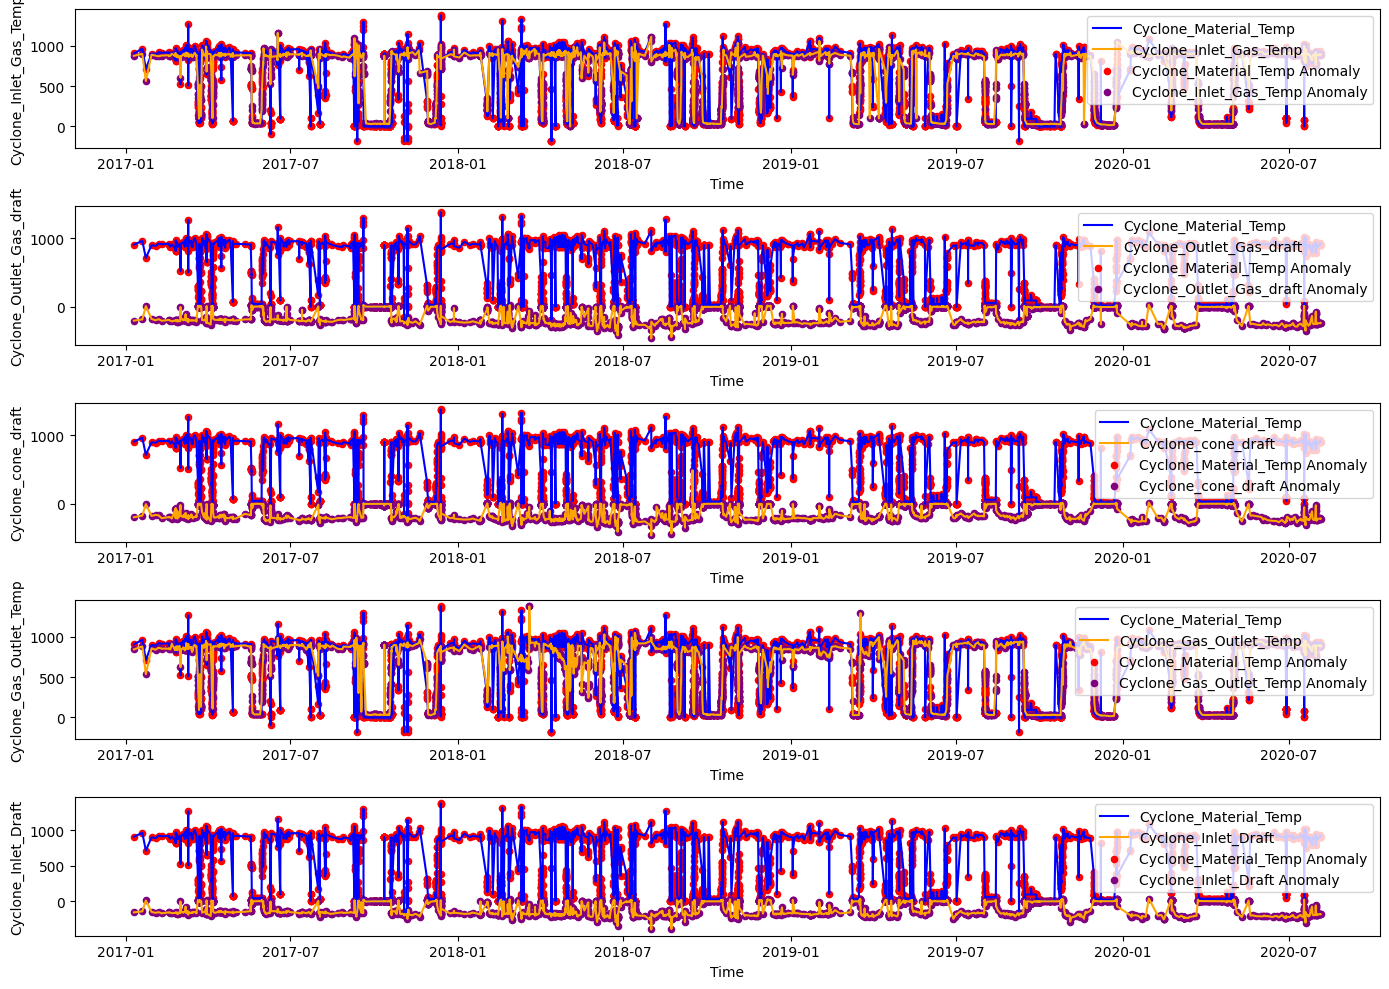

In [23]:
import matplotlib.pyplot as plt

columns_to_plot = [
    'Cyclone_Inlet_Gas_Temp', 'Cyclone_Outlet_Gas_draft',
    'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'
]

plt.figure(figsize=(14, 10))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.plot(data['time'], data['Cyclone_Material_Temp'], label='Cyclone_Material_Temp', color='blue')
    plt.plot(data['time'], data[col], label=col, color='orange')

    anomaly_times = anomalies['time']
    plt.scatter(anomaly_times, anomalies['Cyclone_Material_Temp'], color='red', label='Cyclone_Material_Temp Anomaly', s=20)
    plt.scatter(anomaly_times, anomalies[col], color='purple', label=f'{col} Anomaly', s=20)

    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
